In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

In [2]:
data = pd.read_csv('linsep.txt',names=["X","Y","Z"])

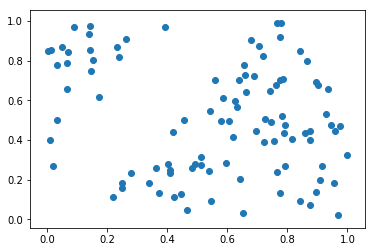

In [3]:
plt.scatter(data['X'],data['Y'])

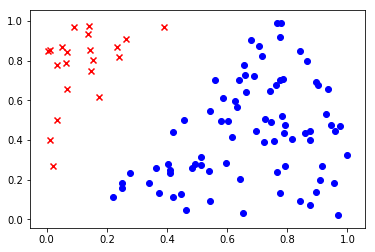

In [119]:
x_pos=data[data['Z']==1]
x_neg=data[data['Z']==-1]
plt.scatter(x_pos['X'],x_pos['Y'],marker = 'o', color = 'b')
plt.scatter(x_neg['X'],x_neg['Y'],marker = 'x', color = 'r')

In [120]:
x1=data.loc[:,['X','Y']]
x2=data.loc[:,'Z']
y=np.array(x2)
X=np.array(x1)


In [121]:
#Initializing values and computing H. Note the 1. to force to float type
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Setting solver parameters (change default to decrease tolerance) 
cvxopt_solvers.options['show_progress'] = False
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

In [122]:
#w parameter in vectorized form
w = ((y * alphas).T @ X).reshape(-1,1)

#Selecting the set of indices S corresponding to non zero parameters
S = (alphas > 1e-4).flatten()

#Computing b
b = y[S] - np.dot(X[S], w)

#Display results
print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])
w

Alphas =  [33.73875238  1.29468499 32.44406739]
w =  [ 7.2500563  -3.86188923]
b =  [-0.10698734]


array([[ 7.2500563 ],
       [-3.86188923]])

In [128]:
def plot_data_with_labels(x, y, ax):
    unique = np.unique(y)
    COLORS = ['red', 'blue']
    for li in range(len(unique)):
        x_sub = x[y == unique[li]]
        ax.scatter(x_sub[:, 0], x_sub[:, 1], c = COLORS[li])
    
    
    
def plot_separator(ax, w, b):
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    x = np.arange(0, 2)
    ax.plot(x, x * slope + intercept, 'k-')

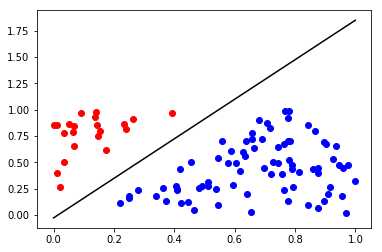

In [129]:
fig, ax = plt.subplots()
y=np.array(x2)
plot_data_with_labels(X, y, ax)
plot_separator(ax, w, b[0])
plt.show()